# Actividad 3 (Segmentación)
- Miranda Eugenia Colorado Arróniz A01737027
- Ciudad escogida: Hawaii

## Inciso b)
### K= 2, Variables = "calculated_host_listings_count", "number_of_reviews", “minimum_nights” y “price”

In [14]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
# Convertir el dataset en un dataframe
df= pd.read_csv("listings_filtrado.csv")
df

# Sustituir los valores nulos por los no nulos hacia adelante
df = df.fillna(method="ffill")

# Limpiar la columna 'price' para quitar el símbolo de dólar y convertir a float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Ahora selecciona las columnas para clustering
X = df[['calculated_host_listings_count', 'number_of_reviews', 'minimum_nights', 'price']].values

<>:9: SyntaxWarning: invalid escape sequence '\$'
<>:9: SyntaxWarning: invalid escape sequence '\$'
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_36541/2327659772.py:9: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
/var/folders/qg/1b6k32sd5_d2jr8q3bhrhg1r0000gn/T/ipykernel_36541/2327659772.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


In [16]:
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
#Aplicamos K-means con 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [18]:
#Entrenamos el modelo
etiquetas = kmeans.fit_predict(X_scaled)
etiquetas

array([1, 1, 1, ..., 1, 1, 1], shape=(36125,), dtype=int32)

In [19]:
#Obtenemos los centroides finales del modelo K-means
centroides = kmeans.cluster_centers_
centroides

array([[ 1.54755072, -0.38880379,  0.39659004,  0.31053163],
       [-0.43413266,  0.10907069, -0.11125496, -0.08711309]])

In [20]:
# Eliminar la columna 'cluster_2D' si ya existe
if 'cluster_4D' in df.columns:
    df.drop('cluster_4D', axis=1, inplace=True)

# Agregamos la columna cluster_4D con las etiquetas obtenidas en una posición específica
df.insert(loc=1, column='cluster_4D', value= etiquetas)
df


,id,cluster_4D,listing_url,name,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5269,1,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"We are located on the ""sunny side"" of Waimea, ...",https://a0.muscache.com/pictures/5b52b72f-5a09...,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,2009-02-09,...,4.55,4.95,4.85,5.00,4.85,f,3,3,0,0
1,5387,1,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,IN a Farm belt area with small commercial farm...,https://a0.muscache.com/pictures/1170713/dca6a...,7878,https://www.airbnb.com/users/show/7878,Edward,2009-02-13,...,4.42,4.85,4.88,4.74,4.78,t,2,2,0,0
2,5480,1,https://www.airbnb.com/rooms/5480,Isle Of You Naturally Farm Retreat,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/75530989/8ed3...,8145,https://www.airbnb.com/users/show/8145,Normand,2009-02-18,...,4.42,4.85,4.88,4.74,4.78,f,3,0,3,0
3,5532,1,https://www.airbnb.com/rooms/5532,2BR Waialua Beach Condo w/ Saltwater Pool & Sauna,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/13743/134691a...,8279,https://www.airbnb.com/users/show/8279,Sarada,2009-02-20,...,4.42,4.85,4.88,4.74,4.78,f,1,1,0,0
4,7888,1,https://www.airbnb.com/rooms/7888,Pineapple House 2 Bed 1 Bath with Loft Entire ...,We are located on a rural one lane road going ...,https://a0.muscache.com/pictures/hosting/Hosti...,22083,https://www.airbnb.com/users/show/22083,Steven,2009-06-17,...,4.70,4.79,4.76,4.25,4.60,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36120,1369817596570977772,1,https://www.airbnb.com/rooms/1369817596570977772,1212 - 1B2OV The Whaler Resort,ONE BLOCK FROM THE BEACH AND ZOO. <br /><br />...,https://a0.muscache.com/pictures/prohost-api/H...,529290529,https://www.airbnb.com/users/show/529290529,The Whaler,2023-08-01,...,5.00,5.00,5.00,5.00,5.00,t,61,61,0,0
36121,1369824863578661367,0,https://www.airbnb.com/rooms/1369824863578661367,MRR: 9BR Luana Garden Villas,"When it is time to leave the resort, Honua Kai...",https://a0.muscache.com/pictures/prohost-api/H...,39073224,https://www.airbnb.com/users/show/39073224,Matthew William,2015-07-20,...,5.00,5.00,5.00,5.00,5.00,t,548,540,8,0
36122,1369841764486904562,1,https://www.airbnb.com/rooms/1369841764486904562,1-br MIL apartment in Wilhelmina,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,19796174,https://www.airbnb.com/users/show/19796174,Marina,2014-08-10,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0
36123,1369865927101822261,1,https://www.airbnb.com/rooms/1369865927101822261,Camping Cheap,Wilhelmina Rise overlooks Kaimuki and Kahala. ...,https://a0.muscache.com/pictures/miso/Hosting-...,595524064,https://www.airbnb.com/users/show/595524064,Brandon,2024-08-11,...,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0


In [21]:
# Reducimos a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centroides_pca=pca.fit_transform(centroides)

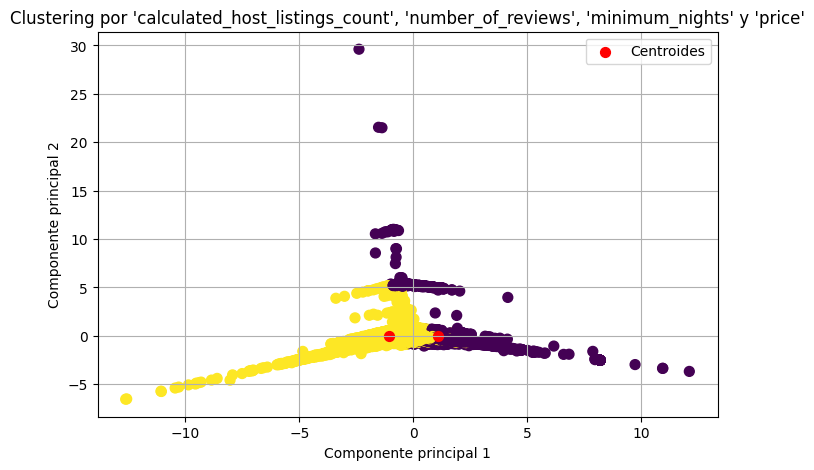

In [22]:
# Para visualizar en 4D, Se reduce a 2 dimensiones 
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.scatter(centroides_pca[:, 0], centroides_pca[:, 1], c='red', marker='.', s=200, label='Centroides')
plt.title("Clustering por 'calculated_host_listings_count', 'number_of_reviews', 'minimum_nights' y 'price'")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend()
plt.grid(True)
plt.show()